**GPU selection**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%time

Found GPU at: /device:GPU:0
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


**Connect with Google Drive**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


**Loading "BHDD Data Set"**

In [3]:
import pickle
import numpy as np

#url_path : Path of dataset in your drive
url_path = "/content/gdrive/MyDrive/BHDD_Project/data.pkl" 

dataset = []

with open(url_path,"rb") as file:
    dataset = pickle.load(file)
    
trainDataset = dataset["trainDataset"]
testDataset = dataset["testDataset"]

print("Train Size: {} Test Size: {}".format(len(trainDataset), len(testDataset)))

Train Size: 60000 Test Size: 27561


**Training and Testing Data Sets**

In [4]:
numberOfClass = 10

x_train = [list(td["image"] / 255) for td in trainDataset]
y_train = np.eye(numberOfClass)[np.array([td["label"] for td in trainDataset]).reshape(-1)].tolist() #One-hot encode training labels
x_test = [list(td["image"] / 255) for td in testDataset]
y_test = np.eye(numberOfClass)[np.array([td["label"] for td in testDataset]).reshape(-1)].tolist() #One-hot encode test labels

In [5]:
print("TrainImageShape:" + str(np.shape(x_train)),
     "TrainLabelShape:" + str(np.shape(y_train)),
     "TestImageShape:" + str(np.shape(x_test)),
     "TestLabelShape:" + str(np.shape(y_test)))

TrainImageShape:(60000, 28, 28) TrainLabelShape:(60000, 10) TestImageShape:(27561, 28, 28) TestLabelShape:(27561, 10)


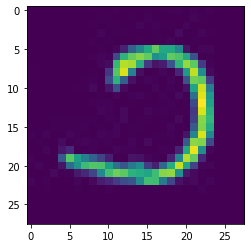

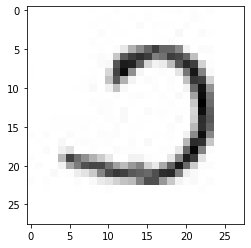

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6])
plt.show()
plt.imshow(x_train[6], cmap = plt.cm.binary)

**Before Normalization**

In [7]:
print(x_train[6])

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.00392157, 0.00392157, 0.00784314,
       0.        , 0.00784314, 0.        , 0.00784314, 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.00392157, 0.        , 0.        , 0.00392157, 0.        ,
       0.00784314, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.00392157, 0.00392157, 0.        , 0.        , 0.01568627,
       0.        , 0.00784314, 0.00392

**Normalization**

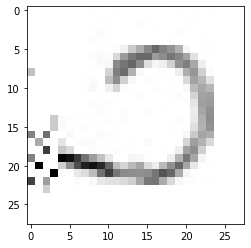

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[6], cmap = plt.cm.binary)

**After Normalization**

In [9]:
print(x_train[6])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00585055 0.         0.         0.00633238
  0.         0.         0.         0.00352879 0.         0.00374353
  0.00327361 0.00605805 0.         0.00419923 0.         0.00624129
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00534469 0.00500307 0.
  0.         0.00316348 0.         0.00705758 0.         0.
  0.         0.         0.         0.00629885 0.00173316 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00585055 0.         0.00500307 0.00316619
  0.         0.         0.01312591 0.         0.00716436 0.00374353
  0.00327361 0.         0.00826108 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01

In [10]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
print(y_train[6])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Resizing Images**

In [12]:
import numpy as np
x_trainr = np.array(x_train).reshape(-1,28,28,1)
x_testr = np.array(x_test).reshape(-1,28,28,1)
print("Trainning Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Trainning Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (27561, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:

model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [18]:
history = model.fit(x_trainr,y_train, epochs=15, validation_split = 0.3)

Epoch 1/15
1313/1313 [==============================] - 19s 6ms/step - loss: 0.2167 - accuracy: 0.9351 - val_loss: 0.0703 - val_accuracy: 0.9799
Epoch 2/15
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 3/15
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0463 - val_accuracy: 0.9866
Epoch 4/15
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 5/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0326 - val_accuracy: 0.9919
Epoch 6/15
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0323 - val_accuracy: 0.9914
Epoch 7/15
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0356 - val_accuracy

In [19]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

862/862 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.9947
Test Loss on 10,000 test samples 0.027178891003131866
Validation Accuracy on 10,000 test samples 0.9947389364242554


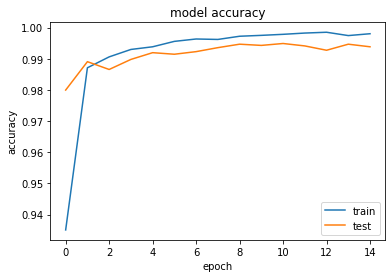

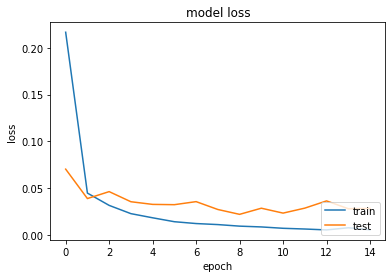

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')

plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')

plt.show()

In [21]:
predictions = model.predict([x_testr])

In [22]:
print(predictions)

[[4.51087667e-10 2.41801024e-10 6.28784733e-07 ... 4.25909866e-06
  1.01163806e-10 1.16939342e-03]
 [7.68442120e-17 1.11157055e-15 1.29369096e-12 ... 3.27344857e-12
  4.31491712e-15 1.48052626e-10]
 [4.70102131e-21 3.43063441e-13 1.00000000e+00 ... 7.81592042e-17
  4.22691272e-21 1.76726702e-13]
 ...
 [1.60547794e-14 2.99641451e-10 7.24380058e-08 ... 4.42991563e-07
  1.87284055e-08 1.12697274e-08]
 [9.99968410e-01 1.09387429e-05 7.29325933e-08 ... 1.09935797e-06
  2.76782998e-07 1.46750139e-07]
 [1.37034222e-04 9.35330391e-01 1.81133710e-02 ... 1.54322595e-04
  5.28787496e-06 1.23590053e-05]]


In [23]:
y_test2 = []
for i in y_test:
  y_test2.append(np.argmax(i))

In [24]:
print(y_test2)

[5, 5, 2, 1, 1, 1, 3, 0, 1, 3, 1, 0, 1, 5, 3, 2, 2, 0, 3, 2, 6, 4, 0, 0, 5, 1, 4, 0, 1, 0, 5, 8, 4, 0, 1, 0, 4, 2, 6, 2, 4, 3, 0, 0, 0, 3, 2, 4, 6, 2, 0, 3, 3, 2, 3, 0, 2, 2, 1, 0, 3, 3, 2, 5, 2, 0, 0, 2, 1, 0, 4, 1, 3, 0, 6, 2, 0, 2, 2, 0, 3, 8, 0, 5, 0, 0, 5, 2, 9, 2, 1, 0, 0, 4, 2, 0, 2, 3, 1, 1, 3, 1, 0, 0, 1, 2, 7, 5, 0, 0, 0, 0, 5, 1, 0, 1, 1, 9, 5, 7, 2, 2, 1, 1, 7, 3, 1, 5, 4, 1, 2, 1, 2, 1, 5, 2, 5, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 8, 3, 4, 0, 1, 2, 2, 0, 9, 4, 2, 1, 3, 1, 0, 2, 2, 3, 4, 0, 7, 1, 4, 0, 4, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 3, 3, 3, 1, 5, 3, 1, 1, 4, 3, 9, 1, 5, 0, 1, 0, 0, 4, 3, 2, 2, 3, 4, 0, 2, 1, 1, 3, 2, 1, 0, 1, 4, 4, 2, 4, 5, 5, 1, 5, 1, 5, 0, 5, 4, 1, 4, 0, 3, 2, 0, 1, 0, 1, 2, 1, 0, 5, 1, 1, 3, 0, 1, 5, 1, 1, 4, 3, 0, 0, 1, 1, 1, 1, 0, 8, 0, 4, 3, 3, 0, 2, 4, 1, 2, 3, 2, 3, 1, 5, 2, 3, 3, 2, 5, 3, 1, 1, 1, 0, 4, 3, 5, 4, 0, 2, 0, 0, 4, 5, 2, 1, 4, 0, 2, 2, 1, 4, 1, 2, 3, 2, 0, 2, 0, 2, 5, 0, 0, 0, 3, 1, 3, 8, 2, 0, 0, 1, 3, 2, 3, 2, 0, 4, 1, 4, 2, 0, 3, 

In [25]:
y_pred = []
for i in predictions:
  y_pred.append(np.argmax(i))

In [26]:
print(y_pred)

[5, 5, 2, 1, 1, 1, 3, 0, 1, 3, 1, 0, 1, 5, 3, 2, 2, 0, 3, 2, 6, 4, 0, 0, 5, 1, 4, 0, 1, 0, 5, 8, 4, 0, 1, 0, 4, 2, 6, 2, 4, 3, 0, 0, 0, 3, 2, 4, 6, 2, 0, 3, 3, 2, 3, 0, 2, 2, 1, 0, 3, 3, 2, 5, 2, 0, 0, 2, 1, 0, 4, 1, 3, 0, 6, 2, 0, 2, 2, 0, 3, 8, 0, 5, 0, 0, 5, 2, 9, 2, 1, 0, 0, 4, 2, 0, 2, 3, 1, 1, 3, 1, 0, 0, 1, 2, 7, 5, 0, 0, 0, 0, 5, 1, 0, 1, 1, 9, 5, 7, 2, 2, 6, 1, 7, 3, 1, 5, 4, 1, 2, 1, 2, 1, 5, 2, 5, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 8, 3, 4, 0, 1, 2, 2, 0, 9, 4, 2, 1, 3, 1, 0, 2, 2, 3, 4, 0, 7, 1, 4, 0, 4, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 3, 3, 3, 1, 5, 3, 1, 1, 4, 3, 9, 1, 5, 0, 1, 0, 0, 4, 3, 2, 2, 3, 4, 0, 2, 1, 1, 3, 2, 1, 0, 1, 4, 4, 2, 4, 5, 5, 1, 5, 1, 5, 0, 5, 4, 1, 4, 0, 3, 2, 0, 1, 0, 1, 2, 1, 0, 5, 1, 1, 3, 0, 1, 9, 1, 1, 4, 3, 0, 0, 1, 1, 1, 1, 0, 8, 0, 4, 3, 3, 0, 2, 4, 1, 2, 3, 2, 3, 1, 5, 2, 3, 3, 2, 5, 3, 1, 1, 1, 0, 4, 3, 5, 4, 0, 2, 0, 0, 4, 5, 2, 1, 4, 0, 2, 2, 1, 4, 1, 2, 3, 2, 0, 2, 0, 2, 5, 0, 0, 0, 3, 1, 3, 8, 2, 0, 0, 1, 3, 2, 3, 2, 0, 4, 1, 4, 2, 0, 3, 

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred)
print(cm)

[[6800   26    2    6    1    0    1    1    6   13]
 [   4 6138    5   10    1    0    2    2    1    0]
 [   0    2 4333    1    0    2    0    0    0    1]
 [   0    5    0 3472    2    0    0    1    0    0]
 [   0    0    0    1 2157    0    0    0    0    4]
 [   0    2    3    0    7 2206    0    9    7    3]
 [   0    0    1    0    0    0  496    0    1    2]
 [   0    0    0    1    1    0    0  607    0    1]
 [   3    0    1    0    0    1    1    0  819    0]
 [   0    0    0    1    0    0    0    0    0  388]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_test2, y_pred)*100,'%')
print('Precision Macro Score',precision_score(y_test2, y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test2, y_pred, average = 'macro')*100,'%')

Accuracy Score 99.47389427089003 %
Precision Macro Score 98.72716257554049 %
Recall_Score 99.45161875389307 %


In [29]:
recall = 99.36483868139065
precision = 98.2961628154501
f1_score = (2*recall*precision)/(recall+precision)
print(f1_score)

98.82761179182855


In [30]:
print(np.argmax(predictions[6]))

3


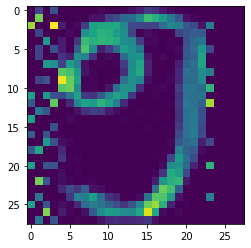

In [31]:
plt.imshow(x_test[0])

In [32]:
model.save('bhdd.h5')